# Line Fitting with Tensorflow Autograd

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl

**Training Data**

We will generate some data.  This time, we will generate a non-linear curve.

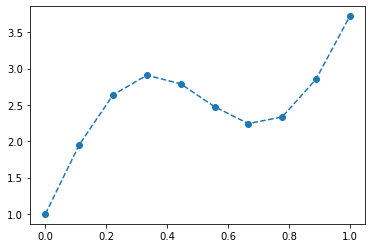

In [2]:
x_data = np.linspace(0, 1, 10)
y_data = 3 * x_data + 1 + np.sin(6*x_data)

pl.plot(x_data, y_data, '--o');

**Model and its parameters**

$$ f(x) = wx + b $$

So the model parameters are $w$ and $b$ which will be TensorFlow variables.

$$ \theta = [w, b] $$

In [3]:
theta = [
    tf.Variable(-1.0, dtype=tf.float64), # w
    tf.Variable(0.0, dtype=tf.float64),  #b
]

def f(x):
    w, b = theta
    return w*x + b

**Loss function**

$$ L = \frac{1}{n}\sum_i(y_{data}[i] - y_{pred}[i])^2$$

In [4]:
def loss(y_data, y_pred):
    return tf.reduce_mean((y_data - y_pred)**2)

**Optimizer**

- The optimizer will use GradientTape to compute the gradient.


- It will adjust the model parameter by **one** step against the gradient according to some learning rate.

In [5]:
def optimize(alpha):
    with tf.GradientTape() as tape:
        L = loss(y_data, f(x_data))
        
    grads = tape.gradient(L, theta)
    for (grad, var) in zip(grads, theta):
        var.assign_sub(alpha * grad)
    
    # Return the new loss
    return loss(y_data, f(x_data))

**Training**

- Use the optimize to adjust the model
  parameters $n$ times.
  
  
- Each iteration is call an **epoch**.


- $n$ is the number of **epoches**.

In [6]:
def train(theta_init, alpha, epochs):
    for var, val_init in zip(theta, theta_init):
        var.assign(val_init)
        
    for i in range(epochs):
        L = optimize(alpha)
        if (i % (epochs // 10)) == 0:
            print("[%.2d] %.2f" % (i, L.numpy()))

We will initialize the model parameters as:

- $w = -1.0$

- $b = 0$

In [7]:
train([-1.0, 0.0], 0.01, 1000)

[00] 9.33
[100] 0.39
[200] 0.31
[300] 0.29
[400] 0.27
[500] 0.26
[600] 0.25
[700] 0.25
[800] 0.24
[900] 0.24


Plot the model prediction against data.

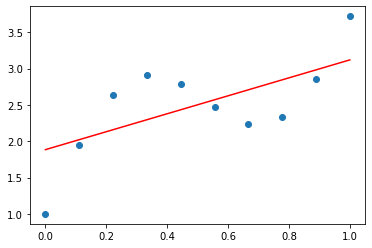

In [9]:
pl.plot(x_data, f(x_data), color='red')
pl.plot(x_data, y_data, 'o');